# Árvores de Decisão: Classificação


## Modelo de definição orquídea/não orquídea.

In [ ]:
# Pacotes de Preparação de Dados
import pandas as pd
import numpy as np

# Pacotes Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de Modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# Módulo de Análise Exploratória
from aed_novo import * #type: ignore

In [ ]:
df_iris = pd.read_csv('iris2.csv')
df_iris.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_iris.Tipo_Orquidea.value_counts()
# 0 é não orquíeda, já 1 é orquídea.

,count
Tipo_Orquidea,
0,100
1,50


### Vizualizando Correlações

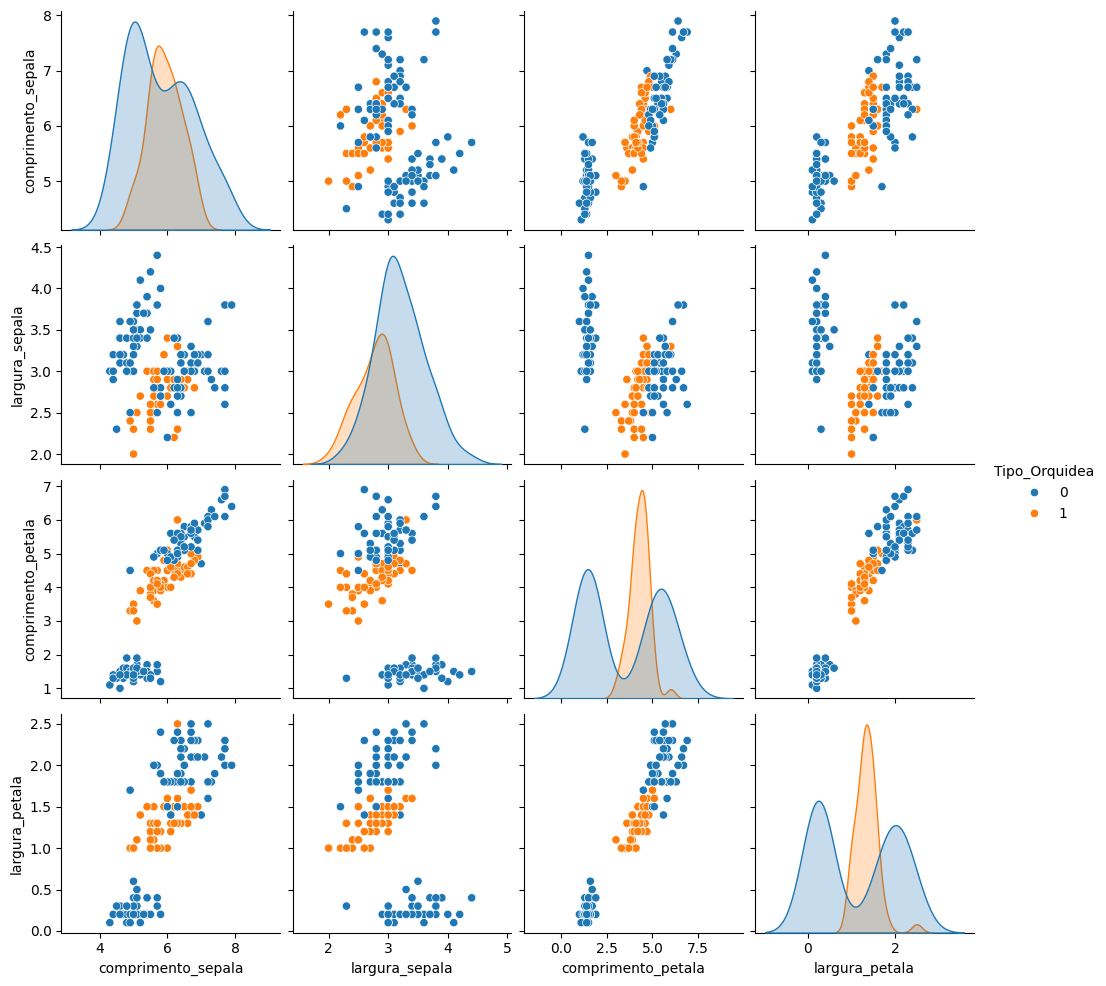

In [ ]:
sns.pairplot(df_iris, hue='Tipo_Orquidea')

In [ ]:
df_iv = analise_iv(df_iris, target= 'Tipo_Orquidea')
df_iv.get_lista_iv()

/content/aed_novo.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed_novo.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed_novo.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed_novo.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify obse

Tipo_Orquidea,IV
Variavel,
largura_petala,4.16
comprimento_petala,3.99
largura_sepala,0.60
comprimento_sepala,0.57


### Treinamento do Modelo


In [ ]:
# Target (variável resposta)
y = df_iris['Tipo_Orquidea']

# Features (variáveis explicativas)
x = df_iris.drop('Tipo_Orquidea', axis=1)


In [ ]:
# Modelagem

model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(x, y)



DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'comprimento_petala <= 2.45\ngini = 0.444\nsamples = 150\nvalue = [100, 50]\nclass = Não Orquídea'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]\nclass = Não Orquídea'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'largura_petala <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [50, 50]\nclass = Não Orquídea'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.198\nsamples = 54\nvalue = [6, 48]\nclass = Orquídea'),
 Text(0.8, 0.16666666666666666, 'gini = 0.083\nsamples = 46\nvalue = [44, 2]\nclass = Não Orquídea')]

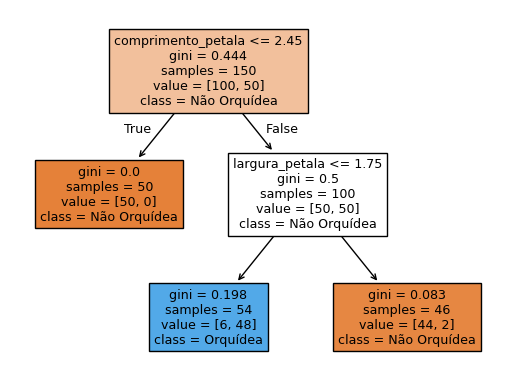

In [ ]:
tree.plot_tree(model, feature_names=x.columns, filled=True, class_names=['Não Orquídea', 'Orquídea'])

## Modelo de Análise de Turnover

In [19]:
df = pd.read_csv('base_rh.csv')
df.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2


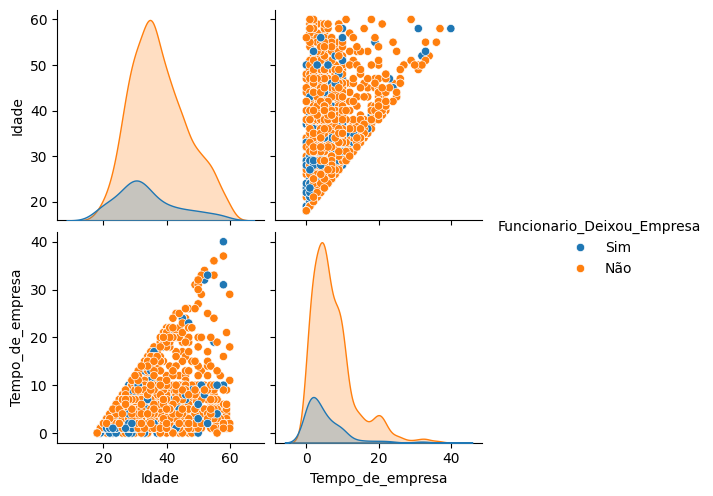

In [24]:
sns.pairplot(df, hue='Funcionario_Deixou_Empresa')

In [25]:
df['Target'] = np.where(df['Funcionario_Deixou_Empresa'] == 'Sim', 1, 0)

In [27]:
df.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa,Target
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6,1
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10,0
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0,1
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8,0
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2,0


In [28]:
df_iv = analise_iv(df, target= 'Target')
df_iv.get_lista_iv()

/content/aed_novo.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],
/content/aed_novo.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed_novo.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',


Target,IV
Variavel,
Funcionario_Deixou_Empresa,9.21
Faz_hora_extras,0.40
Tempo_de_empresa,0.34
Idade,0.31
Estado_Civil,0.22
Freq_Viagens,0.13
Equilibrio_de_Vida,0.06
Formacao,0.01


### Criação das variáveis dummies

In [30]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Idade,Tempo_de_empresa,Target,Funcionario_Deixou_Empresa_Não,Funcionario_Deixou_Empresa_Sim,Freq_Viagens_Não viaja,Freq_Viagens_Viaja frequentemente,Freq_Viagens_Viaja raramente,Formacao_Doutorado,Formacao_Ensino Médio,Formacao_Ensino Superior,Formacao_Ensino Técnico,Formacao_Mestrado,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras_Não,Faz_hora_extras_Sim,Equilibrio_de_Vida_Bom,Equilibrio_de_Vida_Excelente,Equilibrio_de_Vida_Muito bom,Equilibrio_de_Vida_Ruim
0,41,6,1,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True
1,49,10,0,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False
2,37,0,1,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False
3,33,8,0,True,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False
4,27,2,0,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False


In [32]:
# Var Target
y = df_dummies['Target']

# Features
x = df_dummies.drop(['Target', 'Funcionario_Deixou_Empresa_Não', 'Funcionario_Deixou_Empresa_Sim'], axis=1)


In [82]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(x, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

[Text(0.5, 0.9, 'Faz_hora_extras_Sim <= 0.5\ngini = 0.27\nsamples = 1470\nvalue = [1233.0, 237.0]\nclass = Não Turnover'),
 Text(0.25, 0.7, 'Tempo_de_empresa <= 1.5\ngini = 0.187\nsamples = 1054\nvalue = [944, 110]\nclass = Não Turnover'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Idade <= 32.5\ngini = 0.378\nsamples = 146\nvalue = [109, 37]\nclass = Não Turnover'),
 Text(0.0625, 0.3, 'Freq_Viagens_Viaja frequentemente <= 0.5\ngini = 0.493\nsamples = 68\nvalue = [38, 30]\nclass = Não Turnover'),
 Text(0.03125, 0.1, 'gini = 0.459\nsamples = 56\nvalue = [36, 20]\nclass = Não Turnover'),
 Text(0.09375, 0.1, 'gini = 0.278\nsamples = 12\nvalue = [2, 10]\nclass = Turnover'),
 Text(0.1875, 0.3, 'Equilibrio_de_Vida_Ruim <= 0.5\ngini = 0.163\nsamples = 78\nvalue = [71, 7]\nclass = Não Turnover'),
 Text(0.15625, 0.1, 'gini = 0.128\nsamples = 73\nvalue = [68, 5]\nclass = Não Turnover'),
 Text(0.21875, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = Não Turnover'),
 Text(0.375, 0.5, 

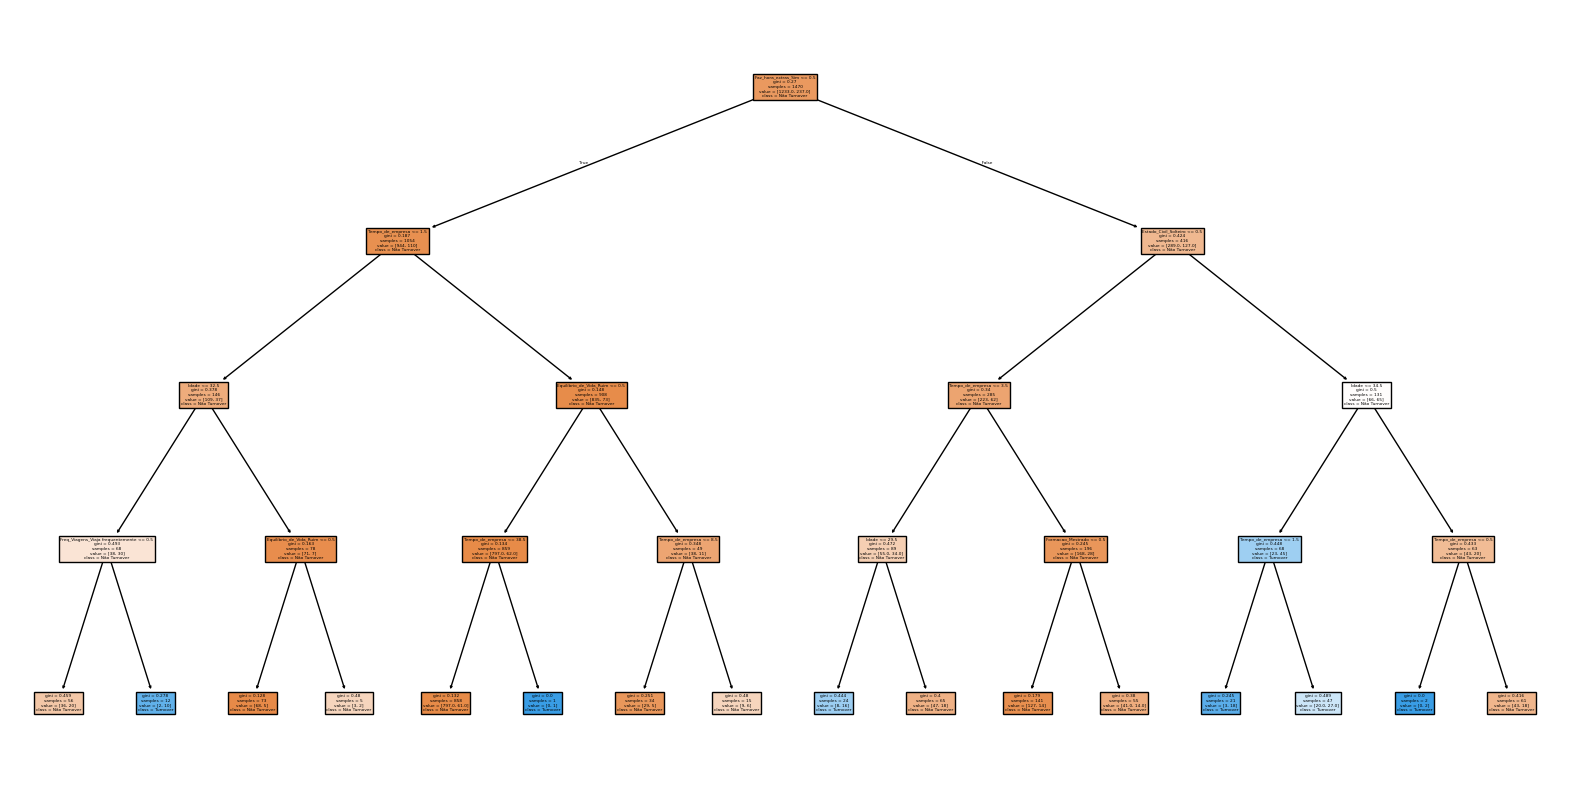

In [83]:
# Avaliação do Modelo treinado
plt.figure(figsize=(20, 10))
plt.title('Arvore de Decisão')
tree.plot_tree(model, feature_names=x.columns, filled=True, class_names=['Não Turnover', 'Turnover'])

In [79]:
# Cálculo do Desempenho do Modelo:

print(f'Acurácia: {round(accuracy_score(y, model.predict(x)), 2) * 100}%')

Acurácia: 87.0%
